# Regresión lineal y Mínimos cuadrados

Es un modelo en el cual, dado un vector de inputs $X^T=X_1,X_2,...,X_k$ , predecimos los outputs de Y.  

En el modelo de regresión lineal simple, el modelo poblacional es:
$$y=\beta_0+\sum_{j=1}^k\beta_jx_j+u$$

Donde $x$ es la variable independiente, $y$ es la variable dependiente y u es la perturbación (error de medición de la variable dependiente), es decir, el resto de factores diferentes a $x$ que afectan a $y$. La perturbación es una variable no observable.  
  
Los parámetros $\beta_1$
En la regresion lineal simple de $y$ sobre $x$
$$X=\begin{bmatrix}{x_{11}}&{x_{12}}&{x_{13}}&{x_{1k}}\\{x_{21}}&{x_{22}}&{x_{23}}&{x_{2k}}\\{x_{31}}&{x_{32}}&{x_{33}}&{x_{3k}}\\{x_{n1}}&{x_{n2}}&{x_{n3}}&{x_{nk}}\end{bmatrix}$$

$$Y=\begin{bmatrix}{y_1}\\{y_2}\\{y_3}\\{y_4}\end{bmatrix}$$

$$W=\begin{bmatrix}{w_1}&{w_2}&{w_3}&{w_4}\end{bmatrix}$$

Por lo que el modelo poblacional para todas las observaciones de la muestra es:

$$\left\begin{array}{c}y_1=w_0+w_1x_{11}+w_2x_{12}+w_2x_{13}\\y_2=w_0+w_1x_{21}+w_2x_{22}+w_2x_{23}\\y_3=w_0+w_1x_{31}+w_2x_{32}+w_2x_{33}\\y_4=w_0+w_1x_{41}+w_2x_{42}+w_2x_{43}\end{array}\right$$

Matriz regresores:

$$Y=XW + u$$

Donde Y es un vector (nx1), X es una matrix (nxk), β es un vector (kx1) y u es un vector (nx1).

$$\begin{bmatrix}{y_1}\\{y_2}\\{y_3}\\{...}\\{y_k}\end{bmatrix}=\begin{bmatrix}{x_{11}}&{x_{12}}&{x_{13}}&{x_{1k}}\\{x_{21}}&{x_{22}}&{x_{23}}&{x_{2k}}\\{x_{31}}&{x_{32}}&{x_{33}}&{x_{3k}}\\{x_{n1}}&{x_{n2}}&{x_{n3}}&{x_{nk}}\end{bmatrix}·\begin{bmatrix}{w_1}&{w_2}&{w_3}&{...}&{w_k}\end{bmatrix}+\begin{bmatrix}{u_1}\\{u_2}\\{u_3}\\{...}\\{u_k}\end{bmatrix}$$

$$\beta=(X^TX)^{-1}X^TY$$

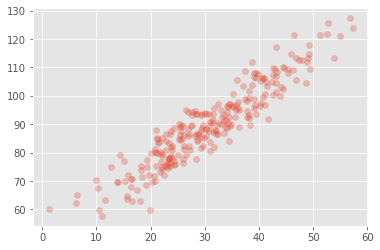

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
%matplotlib inline
plt.style.use('ggplot')

theta_real_0 = 50
theta_real_1 = 1.3

xs = np.random.normal(30.0, 10.0, 250)
ys = theta_real_0 + theta_real_1*xs + np.random.normal(0, 5.0, 250)

plt.scatter(xs,ys,alpha=0.3) #alpha es transparencia a los puntos

#Tenemos una tendencia lineal

#Le añadimos a la variable X una columna de unos del tamaño igual a xs
#Además añadimos al final .T (traspuesta)
X=np.array([np.ones(xs.shape),xs]).T
# xs.shape = (250,)
# X.shape = (250,2)




Implementamos con código la fórmula de minimizar el error cuadrático (MCO)
$$\beta=(X^TX)^{-1}X^TY$$

Estamos trabajando de forma vectorial, tenemos matrices y podemos operar con ellas.

In [30]:
#np.linalg.inv = inversa de la matriz
B=np.linalg.inv(X.T @ X) @X.T @ys
B
# B.shape = (2,)
# tenemos alpha y beta
# beta_1 (o.o): 50.51502761
# beta_2 (pte): 1.27806051



array([50.41502761,  1.27806051])

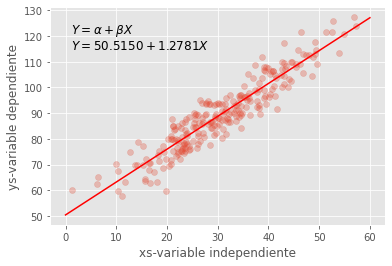

In [32]:
plt.scatter(xs,ys,alpha=0.3)
plt.plot([0,60], [B[0]+B[1]*0, B[0]+B[1]*60], c='r')
plt.xlabel('xs-variable independiente')
plt.ylabel('ys-variable dependiente')
plt.text(1,121,r'$Y=\beta_1+\beta_2X$', fontsize=12)
plt.text(1,115,r'$Y=50.5150+1.2781X$', fontsize=12)
plt.show()

In [34]:
X.shape

(250, 2)

# Gradiente descendiente


El gradiente descendiente calcular el valor mínimo, que parete de la derivada del gradiente.

Ejemplo para una función:
$$y = x^2 + 1$$

Para encontrar el valor mínimo, hay que hacer la derivada de la función:
$$\frac{\partial}{\partial{y}} =2x$$





¿Qué es el Descenso del Gradiente? Algoritmo de inteligencia Artificial.
Funcion de coste f(x) -> cual es el error para cada uno de las combinaciones de nuestros parametros.  
Las funciones pueden ser de dos formas:
 - Convexa. Hay un punto mínimo global en la función. (derivada). Forma de cuenco.
 - No convexa. No se cumple la propiedad de no encontrarnos con un punto minimo que no sea el mínimo de la función.  
 
**¿Cómo encontramos esos mínimos?**  
1. Derivar la función.  
Al derivar una función, la derivada nos da la pendiente de la función en ese punto. 
2. Igualar la pendiente a cero:
$$f'(x)=0$$
- Con la función convexa al hacer la derivada encontramos el punto donde el valor de la función es el mínimo
- Con la función no convexa al hacer la derivada podemos encontrar múltiples puntos mínimos y por lo tanto múltiples ecuaciones que resolver. Podemos tener otras zonas de la función con pendiente nula:
    - Maximos locales
    - Puntos de inflexión
    - Puntos de silla

Cuando resolvimos el modelo de regresión lineal forzamos a que la función de coste fuese igual al error cuadrático medio, porque así podíamos obtener una función con la forma covexa y por lo tanto, más fácil de calcular. 
Pero el machine learning nos obliga a buscar un algoritmo para las funciones no convexas.  

Empezamos el entrenamiento con valores aleatorios. 

1. Localizar la mayor pendiente.
Podemos evaluar la pendiente en la posición en la que nos encontramos, es decir, **calcular la derivada** de la función en dicho punto. Como la función es multidimensional, tendremos que calcular derivadas parciales para cada uno de nuestros parámetros y cada uno de esos valores nos dirá cual es la pendiente en el eje de dicho parámetro.
$${\frac{\partial{error}}{\partial{\theta_1}}}\qquad{\frac{\partial{error}}{\partial{\theta_2}}}$$
2. Gradiente.
Conjuntamente todas estas direcciones parciales conforman un vector que nos indican la dirección hacia la que la pendiente asciende, este vestor se denomina el **gradiente**. Calculamos el gradiente (es un vector)
$$\begin{bmatrix}{\frac{\partial{error}}{\partial{\theta_1}}}\\{\frac{\partial{error}}{\partial{\theta_2}}}\end{bmatrix}=\nabla{f}$$

Lo que queremos hacer es descender, por lo que podemos tomar este valor del gradiente para tomar el sentido opuesto.
$$\theta:=\theta-\alpha\nabla{f}$$

Esto nos daria un nuevo conjunto de parámetros y nos lleva a un nuevo lugar de la función. Repetimos el proceso multiples veces hasta que llegamos a un valor donde no hay una variación notable del coste, es decir, la pendiente es próxima a ser nula y es probable que estemos en un mínimo local. Hemos minimizado el coste de la función. También tenemos el ratio de aprendizaje, $\alpha$ (learning rate), que lo que hace es definir cuanto afecta el gradiente a la actualización de nuestros parámetros en cada iteración (cuanto avanzamos en cada paso). $\alpha$ es muy importante porque va a definir el comportamiento de nuestro algoritmo
$$\mbox{Repetir hasta convergencia}\qquad\left\{\theta:=\theta-\alpha\nabla{f}\qquad\right\}$$

 
- Si probamos con un valor de $\alpha$ muy pequeño, poco a poco el punto se aproxima a la zona de mínimo coste aunque a costa de calcular muchas iteraciones, lo cual podría ser ineficiente.
- Si le asignamos un valor de $\alpha$ muy elevado, en cada iteracción los pasos que da son tan largos que el punto es incapaz de introducirse dentro de la zona del mínimo coste, sin llegar a converger. El proceso de optimización queda en un bucle infinito.  

*Conclusión*: La correcta optimización del ratio de aprendizaje es fundamental para que el algoritmo funcione correctamente.



In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
%matplotlib inline
plt.style.use('ggplot')

In [37]:
#Definimos los paráetros iniciales 
x_i = 5

#learning rate
alpha = 0.25
#Número de iteraciones
n_iterations = 100


iterations = []
y = []









**Algoritmo gradiente descendiente.**

In [39]:
#Damos un valor cualquiera a x (i.e:x_i)
x = x_i

for i in range(n_iterations):
    print('-'*20)
    print('iterations',str(i+1))
    
    #Calculo del gradiente (la derivada de la función)
    gradiente = 2*x
    
    #Actualizamos x usando el gradiente (hacemos descender el gradiente con cada nuevo valor)
    x = x-alpha*gradiente
    
    #Almacenamos las iterations y el valor correspondiente
    y_=x**2 + 1
    y.append(y_)
    iterations.append(i+1)
    
    #imprimimos los resultados
    print('x = {}, y = {}'.format(str(x),str(x**2+1)))

--------------------
iterations 1
x = 2.5, y = 7.25
--------------------
iterations 2
x = 1.25, y = 2.5625
--------------------
iterations 3
x = 0.625, y = 1.390625
--------------------
iterations 4
x = 0.3125, y = 1.09765625
--------------------
iterations 5
x = 0.15625, y = 1.0244140625
--------------------
iterations 6
x = 0.078125, y = 1.006103515625
--------------------
iterations 7
x = 0.0390625, y = 1.00152587890625
--------------------
iterations 8
x = 0.01953125, y = 1.0003814697265625
--------------------
iterations 9
x = 0.009765625, y = 1.0000953674316406
--------------------
iterations 10
x = 0.0048828125, y = 1.0000238418579102
--------------------
iterations 11
x = 0.00244140625, y = 1.0000059604644775
--------------------
iterations 12
x = 0.001220703125, y = 1.0000014901161194
--------------------
iterations 13
x = 0.0006103515625, y = 1.0000003725290298
--------------------
iterations 14
x = 0.00030517578125, y = 1.0000000931322575
--------------------
iterations 15
x

Ploteamos

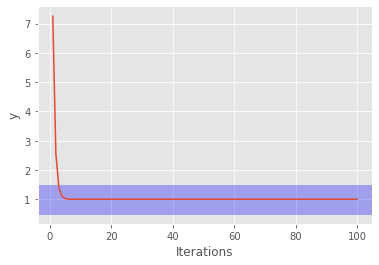

In [6]:
plt.plot(iterations,y)
plt.xlabel('Iterations')
plt.ylabel('y')
plt.axhspan(0.5,1.5, alpha=0.3,color='b')

Ploteamos el gradiente.  
Forma de cuenco (convexa).  
El punto negro indica que hemos llegado al mínimo global de la función convexa.

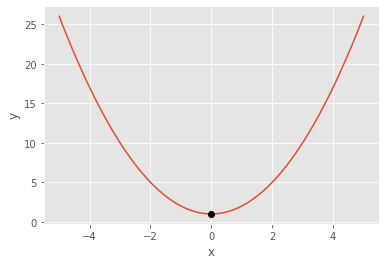

In [18]:
X= np.linspace(-5,5,100)
Y = X**2+1

plt.plot(X,Y)
plt.xlabel('x')
plt.ylabel('y')
pX = 0
pY = pX+1
punto = plt.plot([pX],[pY],'ko')

Para la primera iteración el valor de x es 2.5 y el y es 7.25, pero a medida que avanzan las iteraciones, el valor de x se va acercando a 0 y el valor de y se va acercando a 1.
Necesita unas 8 ó 9 iteraciones estamos en el valor mínimo.
Valor minimo al que queremos llegar es el punto negro.

El algoritmo converge y llega a ese valor.